In [1]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

        word  total_score
11      cool         1128
20   windows         1112
63       fan         1042
6         ac         1016
101      hot          922
..       ...          ...
145     work          220
156  install          219
167     home          214
202   backup          211
227  rebates          206

[247 rows x 2 columns]


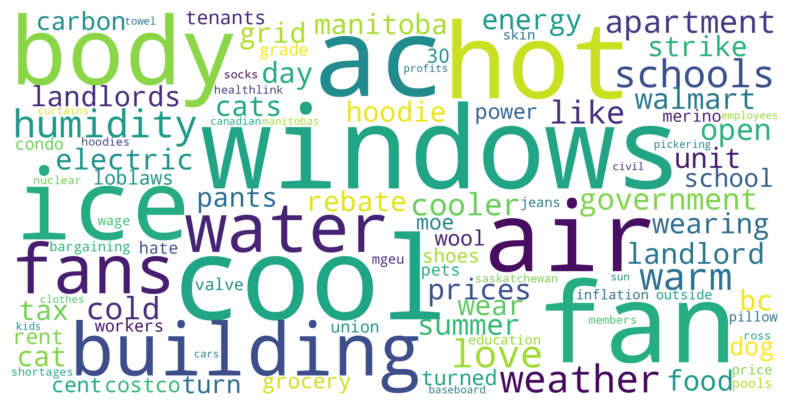

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(style="whitegrid")

top_words_scores = pd.read_csv('stats/top_words_scores.csv', index_col=0)
top_words_scores = top_words_scores.sort_values(by='total_score', ascending=False)
top_words_scores['total_score'] = top_words_scores['total_score'] * 1000
top_words_scores['total_score'] = top_words_scores['total_score'].apply(int)
# top_words_scores = top_words_scores.iloc[:100, :]
print(top_words_scores)
top_words_scores = {top_words_scores.iloc[i, 0]: top_words_scores.iloc[i, 1] for i in range(top_words_scores.shape[0])}


wordcloud = WordCloud(
    width=800,
    height=400,
    max_font_size=120,  # Larger font size for better visibility
    max_words=100,      # Maximum number of words to display
    background_color='white',  # High contrast background
    contour_width=115,    # Optional: adds a contour around words
    scale=3,            # Increases resolution by scaling the canvas by this factor
    prefer_horizontal=1.0  # Prefer horizontal word placement for readability
    ).generate_from_frequencies(top_words_scores)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.savefig('plots/Topic Word Cloud.png', dpi=300, format='png', bbox_inches='tight')
plt.show()

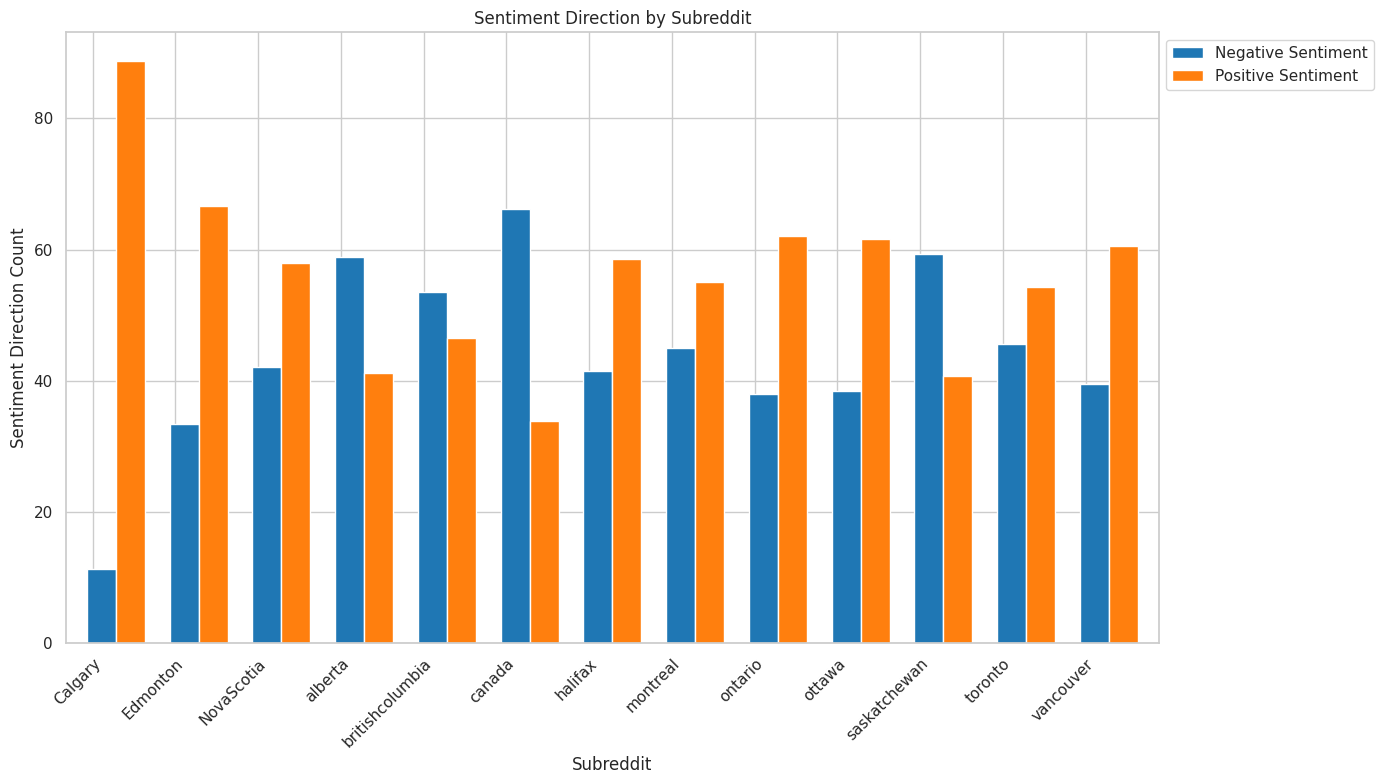

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('stats/sentiment_stats.csv', index_col=0)
data = data[data['sub'].isin(['Calgary', 'Edmonton', 'NovaScotia', 'alberta', 'britishcolumbia', 'canada', 'halifax',
                             'montreal', 'ontario', 'ottawa', 'saskatchewan', 'toronto', 'vancouver'])]

# Setting the aesthetics for the plot
sns.set(style="whitegrid")

# Create pivot table
pivot_table = data.pivot_table(index='sub', columns='sentiment_direction', values='sentiment_direction_count', aggfunc='sum')

# Normalize the values by dividing by the row sum
pivot_table = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# # Calculate percentages for each sentiment direction
# pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Plotting the data
fig, ax = plt.subplots(figsize=(14, 8))

# Bar plot for sentiment direction count as percentage
bars = pivot_table.plot(kind='bar', ax=ax, width=0.7, position=0.1, color=['#1f77b4', '#ff7f0e'])
ax.set_ylabel('Sentiment Direction Count')
ax.set_xlabel('Subreddit')
ax.legend(["Negative Sentiment", "Positive Sentiment"], loc='upper left', bbox_to_anchor=(1, 1))

# Increase padding between x-ticks
ax.set_xticks(range(len(pivot_table)))
ax.set_xticklabels(pivot_table.index, rotation=45, ha='right', rotation_mode='anchor')

# # Adding labels on top of each bar for percentage
# for bar in bars.patches:
#     ax.annotate(format(bar.get_height(), '.1f') + '%', 
#                 (bar.get_x() + bar.get_width() / 2, 
#                  bar.get_height()), ha='center', va='center',
#                  size=10, xytext=(0, 10),
#                  textcoords='offset points')

# # Adding labels on top of each bar
# for bar in bars.patches:
#     ax.annotate(format(bar.get_height(), '.0f'), 
#                 (bar.get_x() + bar.get_width() / 2, 
#                  bar.get_height()), ha='center', va='center',
#                  size=10, xytext=(0, 8),
#                  textcoords='offset points')

# Title and labels
plt.title('Sentiment Direction by Subreddit')
plt.tight_layout()

fig.savefig('plots/Sentiment Direction Normalized by Subreddit.png', dpi=300, format='png', bbox_inches='tight')

plt.show()

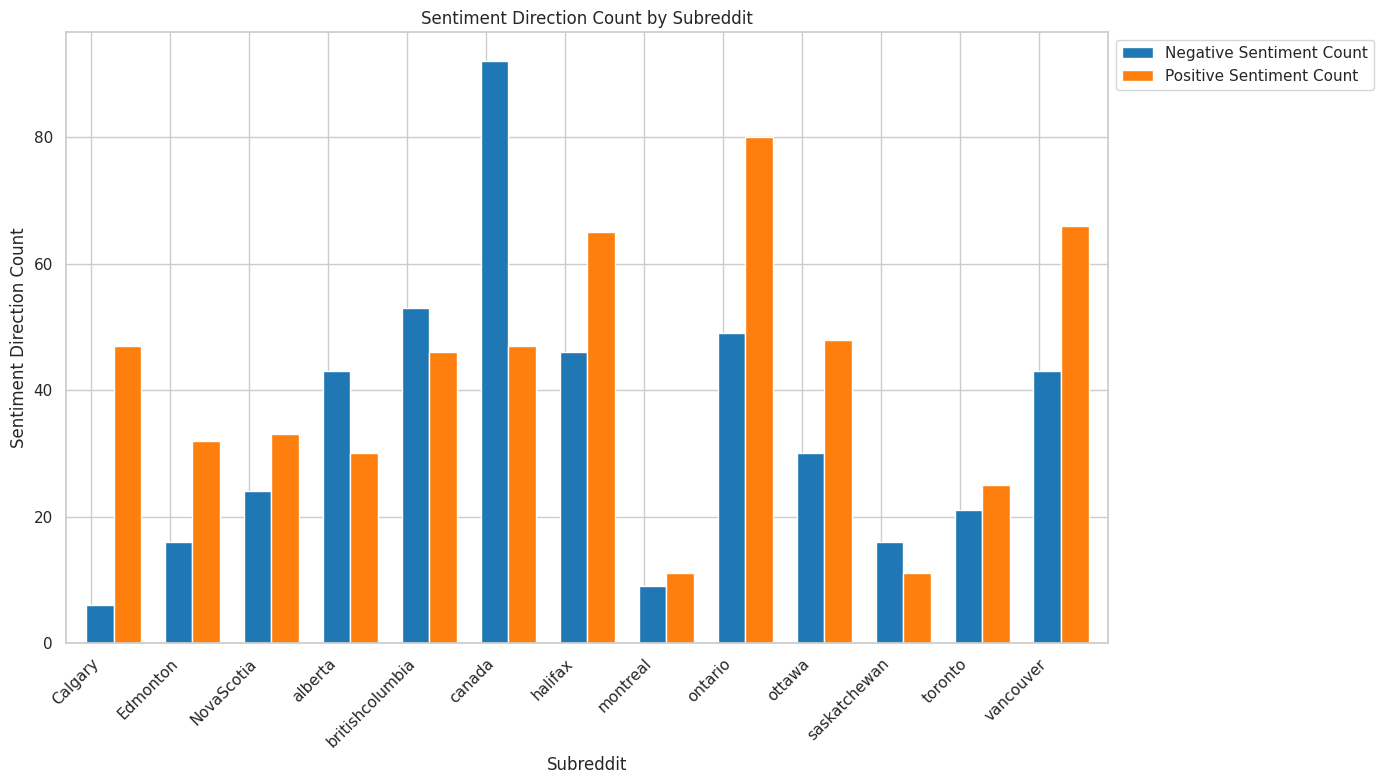

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('stats/sentiment_stats.csv', index_col=0)
data = data[data['sub'].isin(['Calgary', 'Edmonton', 'NovaScotia', 'alberta', 'britishcolumbia', 'canada', 'halifax',
                             'montreal', 'ontario', 'ottawa', 'saskatchewan', 'toronto', 'vancouver'])]

# Setting the aesthetics for the plot
sns.set(style="whitegrid")

# Creating a pivot table for better visualization
pivot_table = data.pivot(index='sub', columns='sentiment_direction', values='sentiment_direction_count')

# # Calculate percentages for each sentiment direction
# pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Plotting the data
fig, ax = plt.subplots(figsize=(14, 8))

# Bar plot for sentiment direction count as percentage
bars = pivot_table.plot(kind='bar', ax=ax, width=0.7, position=0.1, color=['#1f77b4', '#ff7f0e'])
ax.set_ylabel('Sentiment Direction Count')
ax.set_xlabel('Subreddit')
ax.legend(["Negative Sentiment Count", "Positive Sentiment Count"], loc='upper left', bbox_to_anchor=(1, 1))

# Increase padding between x-ticks
ax.set_xticks(range(len(pivot_table)))
ax.set_xticklabels(pivot_table.index, rotation=45, ha='right', rotation_mode='anchor')

# # Adding labels on top of each bar for percentage
# for bar in bars.patches:
#     ax.annotate(format(bar.get_height(), '.1f') + '%', 
#                 (bar.get_x() + bar.get_width() / 2, 
#                  bar.get_height()), ha='center', va='center',
#                  size=10, xytext=(0, 10),
#                  textcoords='offset points')

# # Adding labels on top of each bar
# for bar in bars.patches:
#     ax.annotate(format(bar.get_height(), '.0f'), 
#                 (bar.get_x() + bar.get_width() / 2, 
#                  bar.get_height()), ha='center', va='center',
#                  size=10, xytext=(0, 8),
#                  textcoords='offset points')

# Title and labels
plt.title('Sentiment Direction Count by Subreddit')
plt.tight_layout()

fig.savefig('plots/Sentiment Direction Count by Subreddit.png', dpi=300, format='png', bbox_inches='tight')

plt.show()

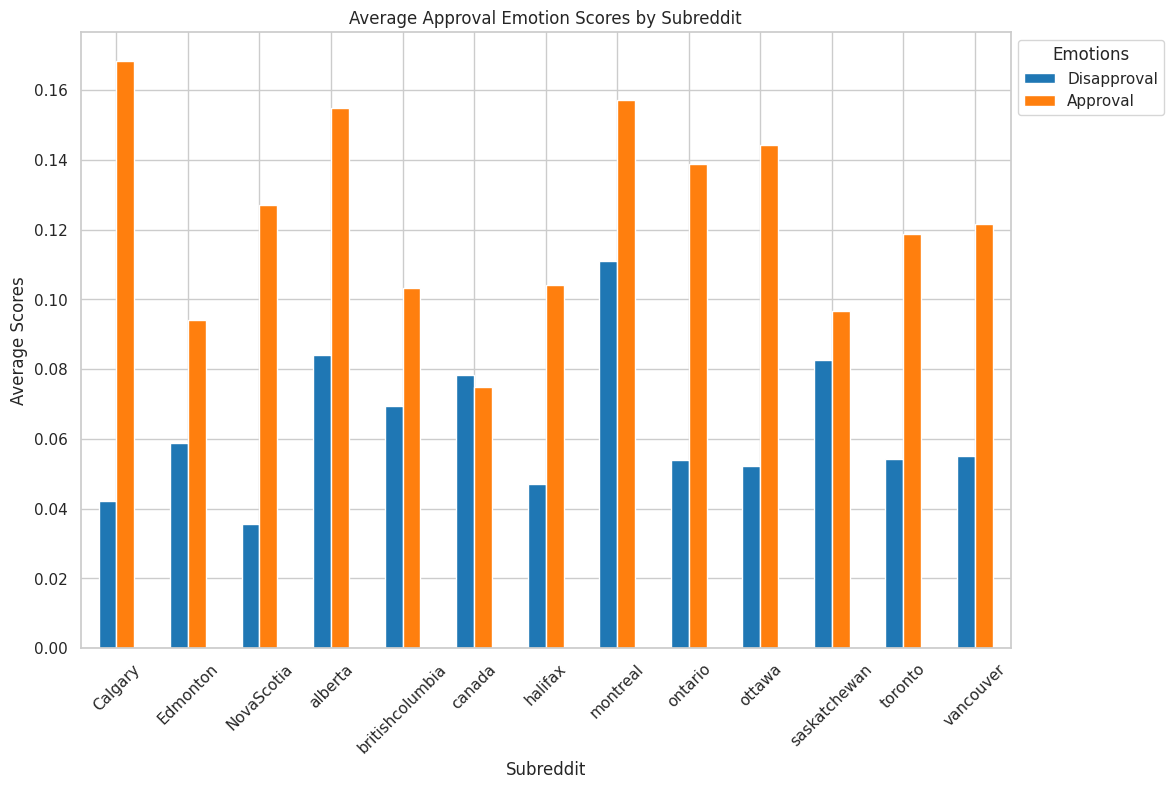

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('stats/emotion_stats.csv', index_col=0)
data = data[data['sub'].isin(['Calgary', 'Edmonton', 'NovaScotia', 'alberta', 'britishcolumbia', 'canada', 'halifax',
                             'montreal', 'ontario', 'ottawa', 'saskatchewan', 'toronto', 'vancouver'])]
data = data.drop(columns=set(data.columns)-{'sub', 'disapproval_avg', 'approval_avg'}, axis=1)
data = data.rename(columns={'disapproval_avg': 'Disapproval', 'approval_avg': 'Approval'})

# Setting the aesthetics for the plot
sns.set(style="whitegrid")

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
data.plot(kind='bar', x='sub', ax=ax, color=['#1f77b4', '#ff7f0e'])

# Labels and title
ax.set_xlabel('Subreddit')
ax.set_ylabel('Average Scores')
ax.set_title('Average Approval Emotion Scores by Subreddit')

# # Annotate bars with associated numbers
# for p in ax.patches:
#     ax.annotate(format(p.get_height(), '.4f'), 
#                 (p.get_x() + p.get_width() / 2, p.get_height()), 
#                 ha='center', va='center', 
#                 xytext=(0, 10), 
#                 textcoords='offset points')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45)
plt.legend(title='Emotions', loc='upper left', bbox_to_anchor=(1, 1))

fig.savefig('plots/Average Approval Emotion Scores by Subreddit.png', dpi=300, format='png', bbox_inches='tight')

plt.show()

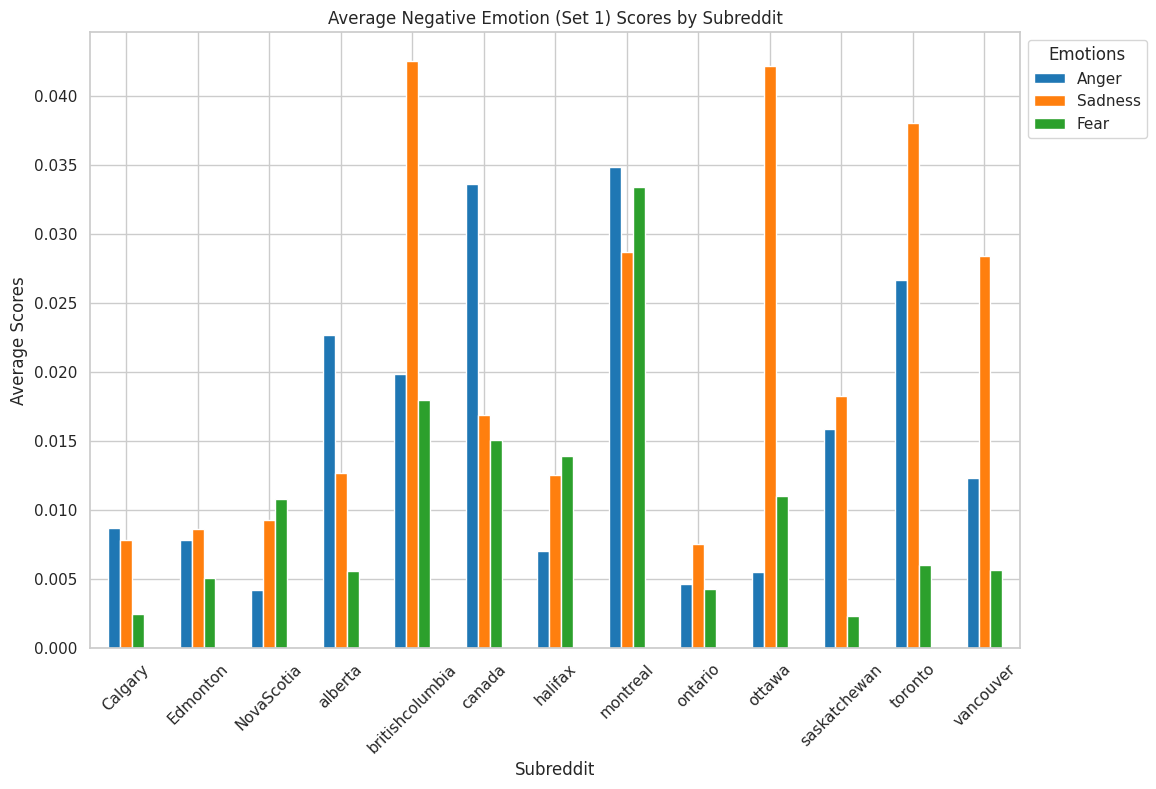

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('stats/emotion_stats.csv', index_col=0)
data = data[data['sub'].isin(['Calgary', 'Edmonton', 'NovaScotia', 'alberta', 'britishcolumbia', 'canada', 'halifax',
                             'montreal', 'ontario', 'ottawa', 'saskatchewan', 'toronto', 'vancouver'])]
data = data.drop(columns=set(data.columns)-{'sub', 'sadness_avg', 'anger_avg', 'fear_avg'}, axis=1)
data = data.rename(columns={'sadness_avg': 'Sadness',
                           'anger_avg': 'Anger', 'fear_avg': 'Fear'})

# Setting the aesthetics for the plot
sns.set(style="whitegrid")

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
data.plot(kind='bar', x='sub', ax=ax, color=colors[:6])

# Labels and title
ax.set_xlabel('Subreddit')
ax.set_ylabel('Average Scores')
ax.set_title('Average Negative Emotion (Set 1) Scores by Subreddit')

# # Annotate bars with associated numbers
# for p in ax.patches:
#     ax.annotate(format(p.get_height(), '.4f'), 
#                 (p.get_x() + p.get_width() / 2, p.get_height()), 
#                 ha='center', va='center', 
#                 xytext=(0, 10), 
#                 textcoords='offset points')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45)
plt.legend(title='Emotions', loc='upper left', bbox_to_anchor=(1, 1))

fig.savefig('plots/Average Negative Emotion (Set 1) Scores by Subreddit.png', dpi=300, format='png', bbox_inches='tight')

plt.show()

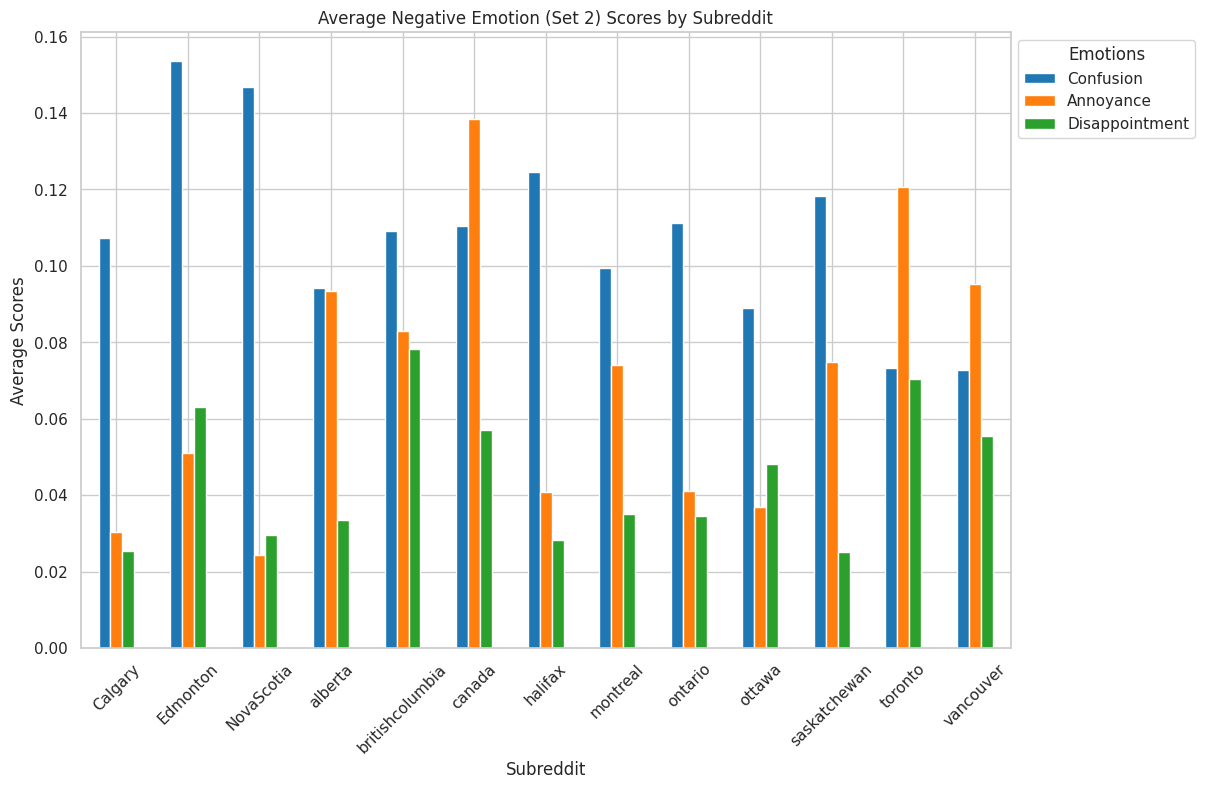

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('stats/emotion_stats.csv', index_col=0)
data = data[data['sub'].isin(['Calgary', 'Edmonton', 'NovaScotia', 'alberta', 'britishcolumbia', 'canada', 'halifax',
                             'montreal', 'ontario', 'ottawa', 'saskatchewan', 'toronto', 'vancouver'])]
data = data.drop(columns=set(data.columns)-{'sub', 'annoyance_avg', 'disappointment_avg', 'confusion_avg'}, axis=1)
data = data.rename(columns={ 'annoyance_avg': 'Annoyance', 'disappointment_avg': 'Disappointment', 'confusion_avg': 'Confusion'})

# Setting the aesthetics for the plot
sns.set(style="whitegrid")

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
data.plot(kind='bar', x='sub', ax=ax, color=colors[:6])

# Labels and title
ax.set_xlabel('Subreddit')
ax.set_ylabel('Average Scores')
ax.set_title('Average Negative Emotion (Set 2) Scores by Subreddit')

# # Annotate bars with associated numbers
# for p in ax.patches:
#     ax.annotate(format(p.get_height(), '.4f'), 
#                 (p.get_x() + p.get_width() / 2, p.get_height()), 
#                 ha='center', va='center', 
#                 xytext=(0, 10), 
#                 textcoords='offset points')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45)
plt.legend(title='Emotions', loc='upper left', bbox_to_anchor=(1, 1))

fig.savefig('plots/Average Negative Emotion Scores (Set 2) by Subreddit.png', dpi=300, format='png', bbox_inches='tight')

plt.show()

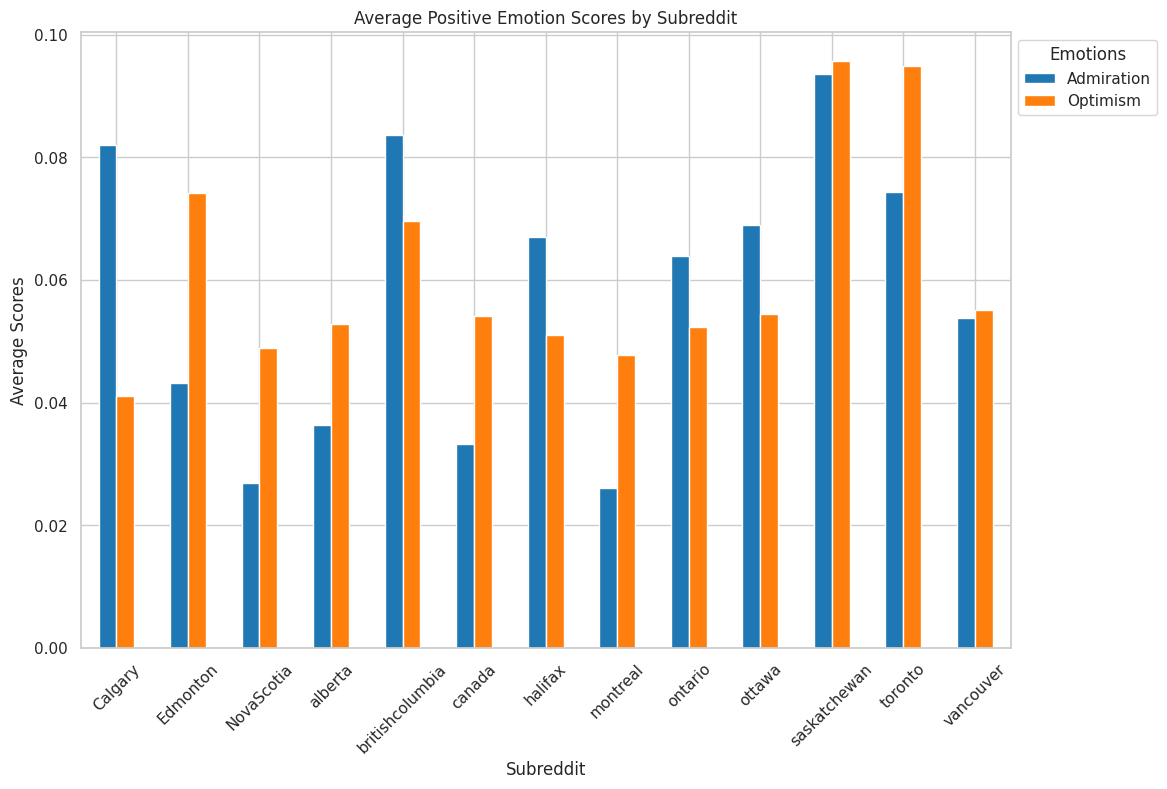

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('stats/emotion_stats.csv', index_col=0)
data = data[data['sub'].isin(['Calgary', 'Edmonton', 'NovaScotia', 'alberta', 'britishcolumbia', 'canada', 'halifax',
                             'montreal', 'ontario', 'ottawa', 'saskatchewan', 'toronto', 'vancouver'])]
data = data.drop(columns=set(data.columns)-{'sub', 'admiration_avg', 'optimism_avg'}, axis=1)
data = data.rename(columns={'admiration_avg': 'Admiration',
                           'optimism_avg': 'Optimism'})

# Setting the aesthetics for the plot
sns.set(style="whitegrid")

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
data.plot(kind='bar', x='sub', ax=ax, color=['#1f77b4', '#ff7f0e'])

# Labels and title
ax.set_xlabel('Subreddit')
ax.set_ylabel('Average Scores')
ax.set_title('Average Positive Emotion Scores by Subreddit')

# # Annotate bars with associated numbers
# for p in ax.patches:
#     ax.annotate(format(p.get_height(), '.4f'), 
#                 (p.get_x() + p.get_width() / 2, p.get_height()), 
#                 ha='center', va='center', 
#                 xytext=(0, 10), 
#                 textcoords='offset points')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45)
plt.legend(title='Emotions', loc='upper left', bbox_to_anchor=(1, 1))

fig.savefig('plots/Average Positive Emotion Scores by Subreddit.png', dpi=300, format='png', bbox_inches='tight')

plt.show()

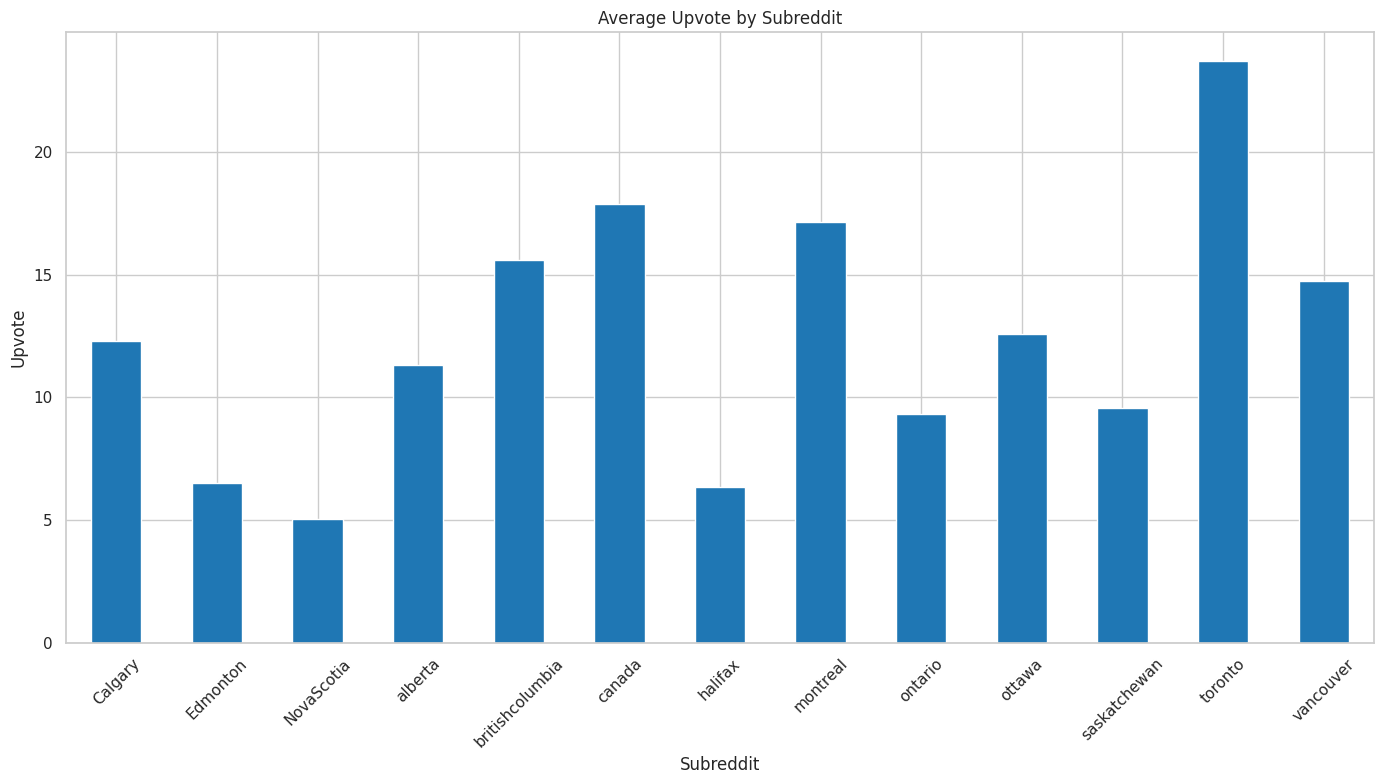

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('stats/upvote_stats.csv', index_col=0)
data = data[data['sub'].isin(['Calgary', 'Edmonton', 'NovaScotia', 'alberta', 'britishcolumbia', 'canada', 'halifax',
                             'montreal', 'ontario', 'ottawa', 'saskatchewan', 'toronto', 'vancouver'])]
# data = data.drop(columns=set(data.columns)-{'sub', 'admiration_avg', 'optimism_avg'}, axis=1)
data = data.rename(columns={'upvote_avg': 'Upvote'})

# Setting the aesthetics for the plot
sns.set(style="whitegrid")

# Define the color for the bar
color = '#1f77b4'  # Blue color from the previous color palette

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
data.plot(kind='bar', x='sub', y='Upvote', ax=ax, color=color, legend=False)  # Remove legend

# Labels and title
ax.set_xlabel('Subreddit')
ax.set_ylabel('Upvote')
ax.set_title('Average Upvote by Subreddit')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45)

# # Annotate bars with the y value
# for p in ax.patches:
#     ax.annotate(format(p.get_height(), '.0f'), 
#                 (p.get_x() + p.get_width() / 2., p.get_height()), 
#                 ha='center', va='center', 
#                 xytext=(0, 10), 
#                 textcoords='offset points')

plt.tight_layout()  # Adjust layout to fit everything properly

fig.savefig('plots/Average Upvote by Subreddit.png', dpi=300, format='png', bbox_inches='tight')

plt.show()

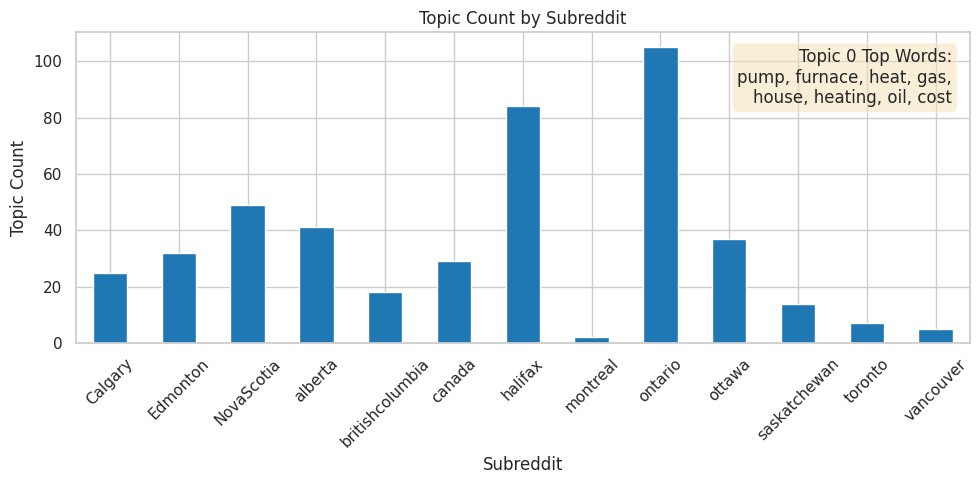

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('stats/topic_stats.csv', index_col=0)
data = data[data['sub'].isin(['Calgary', 'Edmonton', 'NovaScotia', 'alberta', 'britishcolumbia', 'canada', 'halifax',
                             'montreal', 'ontario', 'ottawa', 'saskatchewan', 'toronto', 'vancouver'])]
data = data[data['Topic'].isin([0])]

# Setting the aesthetics for the plot
sns.set(style="whitegrid")

# Define the color for the bar
color = '#1f77b4'  # Blue color from the previous color palette

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))
data.plot(kind='bar', x='sub', y='topic_count', ax=ax, color=color, legend=False)  # Remove legend

# Labels and title
ax.set_xlabel('Subreddit')
ax.set_ylabel('Topic Count')
ax.set_title('Topic Count by Subreddit')

# Adding a text box
textstr = 'Topic 0 Top Words:\npump, furnace, heat, gas,\nhouse, heating, oil, cost'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# Position the text box in axes coords, adjusted to be outside the plot area
ax.text(0.98, 0.95, textstr, transform=ax.transAxes,
        verticalalignment='top', horizontalalignment='right', bbox=props)

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45)

# # Annotate bars with the y value
# for p in ax.patches:
#     ax.annotate(format(p.get_height(), '.0f'), 
#                 (p.get_x() + p.get_width() / 2., p.get_height()), 
#                 ha='center', va='center', 
#                 xytext=(0, 10), 
#                 textcoords='offset points')

plt.tight_layout()  # Adjust layout to fit everything properly

fig.savefig('plots/Topic 0 by Subreddit.png', dpi=300, format='png', bbox_inches='tight')

plt.show()

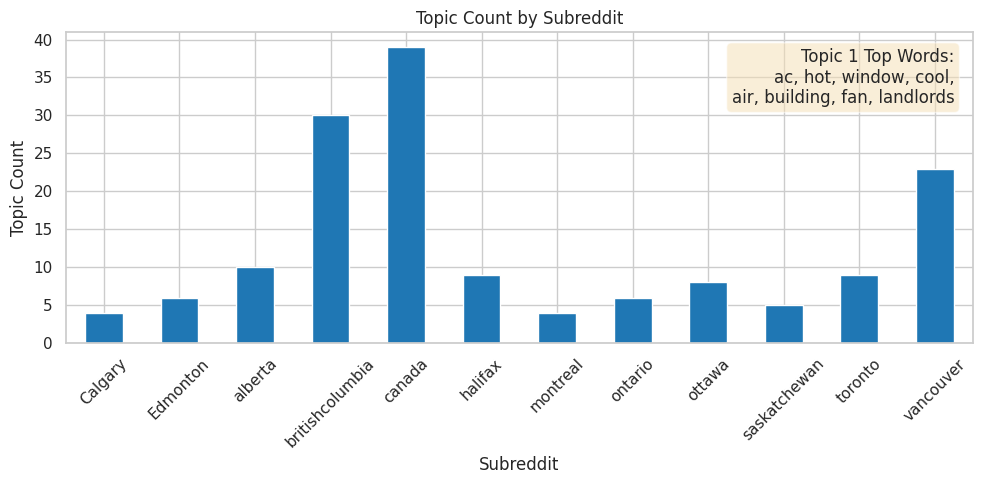

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('stats/topic_stats.csv', index_col=0)
data = data[data['sub'].isin(['Calgary', 'Edmonton', 'NovaScotia', 'alberta', 'britishcolumbia', 'canada', 'halifax',
                             'montreal', 'ontario', 'ottawa', 'saskatchewan', 'toronto', 'vancouver'])]
data = data[data['Topic'].isin([1])]

# Setting the aesthetics for the plot
sns.set(style="whitegrid")

# Define the color for the bar
color = '#1f77b4'  # Blue color from the previous color palette

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))
data.plot(kind='bar', x='sub', y='topic_count', ax=ax, color=color, legend=False)  # Remove legend

# Labels and title
ax.set_xlabel('Subreddit')
ax.set_ylabel('Topic Count')
ax.set_title('Topic Count by Subreddit')

# Adding a text box
textstr = 'Topic 1 Top Words:\nac, hot, window, cool,\nair, building, fan, landlords'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# Place a text box in upper left in axes coords
ax.text(0.98, 0.95, textstr, transform=ax.transAxes,
        verticalalignment='top', horizontalalignment='right', bbox=props)

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45)

# # Annotate bars with the y value
# for p in ax.patches:
#     ax.annotate(format(p.get_height(), '.0f'), 
#                 (p.get_x() + p.get_width() / 2., p.get_height()), 
#                 ha='center', va='center', 
#                 xytext=(0, 10), 
#                 textcoords='offset points')

plt.tight_layout()  # Adjust layout to fit everything properly

fig.savefig('plots/Topic 1 by Subreddit.png', dpi=300, format='png', bbox_inches='tight')

plt.show()

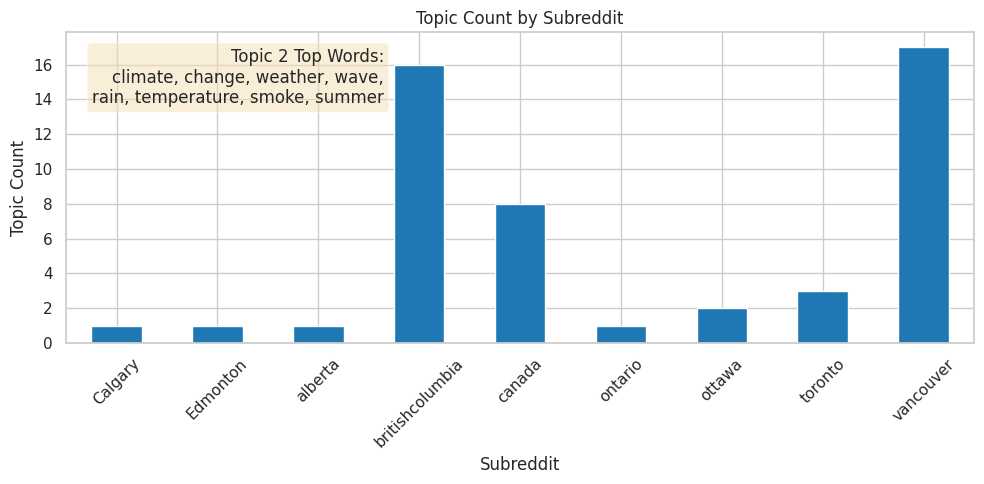

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('stats/topic_stats.csv', index_col=0)
data = data[data['sub'].isin(['Calgary', 'Edmonton', 'NovaScotia', 'alberta', 'britishcolumbia', 'canada', 'halifax',
                             'montreal', 'ontario', 'ottawa', 'saskatchewan', 'toronto', 'vancouver'])]
data = data[data['Topic'].isin([2])]

# Setting the aesthetics for the plot
sns.set(style="whitegrid")

# Define the color for the bar
color = '#1f77b4'  # Blue color from the previous color palette

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))
data.plot(kind='bar', x='sub', y='topic_count', ax=ax, color=color, legend=False)  # Remove legend

# Labels and title
ax.set_xlabel('Subreddit')
ax.set_ylabel('Topic Count')
ax.set_title('Topic Count by Subreddit')

# Adding a text box
textstr = 'Topic 2 Top Words:\nclimate, change, weather, wave,\nrain, temperature, smoke, summer'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# Place a text box in upper left in axes coords
ax.text(0.35, 0.95, textstr, transform=ax.transAxes,
        verticalalignment='top', horizontalalignment='right', bbox=props)

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45)

# # Annotate bars with the y value
# for p in ax.patches:
#     ax.annotate(format(p.get_height(), '.0f'), 
#                 (p.get_x() + p.get_width() / 2., p.get_height()), 
#                 ha='center', va='center', 
#                 xytext=(0, 10), 
#                 textcoords='offset points')

plt.tight_layout()  # Adjust layout to fit everything properly

fig.savefig('plots/Topic 2 by Subreddit.png', dpi=300, format='png', bbox_inches='tight')

plt.show()

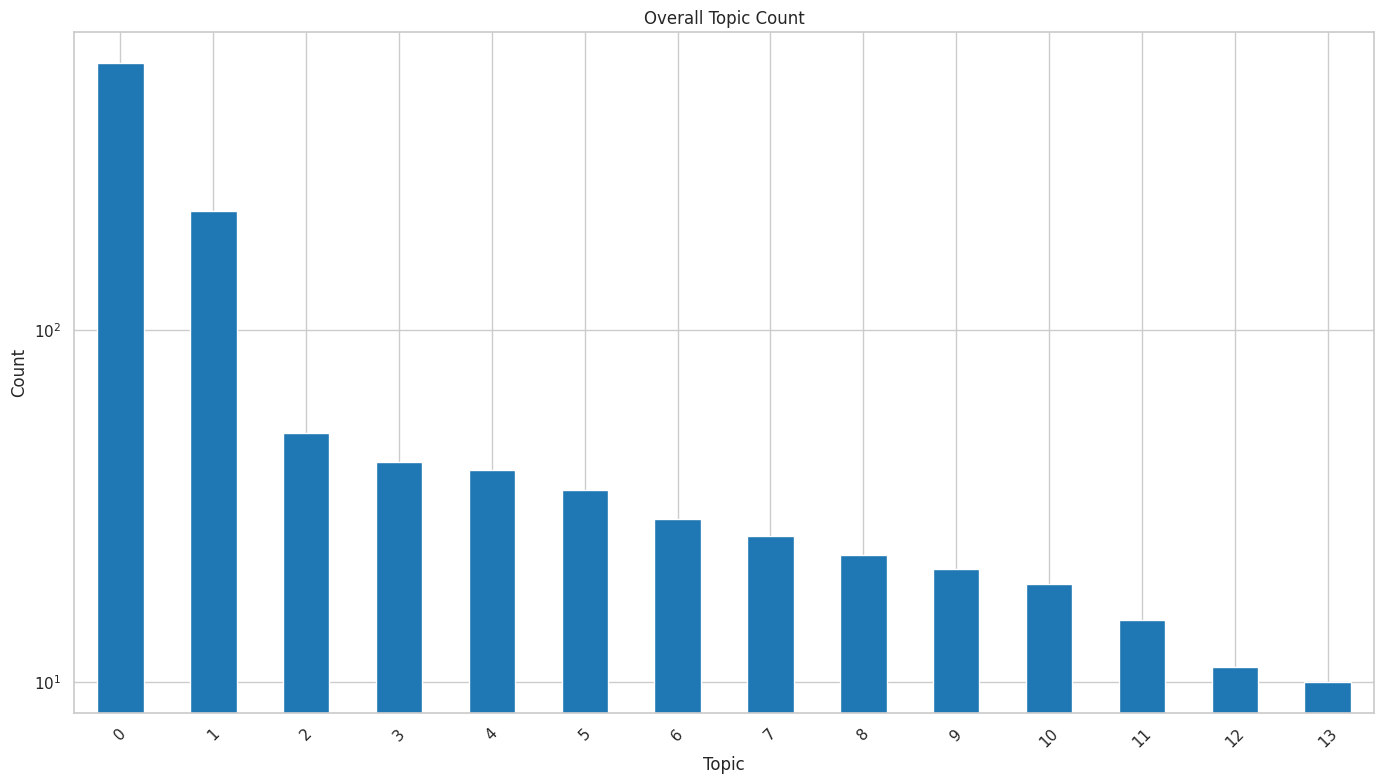

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('stats/overall_topic_stats.csv', index_col=0)
data = data[~data['Topic'].isin([-1])]
data = data.rename(columns={'overall_topic_count': 'topic_count',
                           'overall_topic_probability_avg': 'probability'})

# Setting the aesthetics for the plot
sns.set(style="whitegrid")

# Define the color for the bar
color = '#1f77b4'  # Blue color from the previous color palette

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
data.plot(kind='bar', x='Topic', y='topic_count', ax=ax, color=color, legend=False)  # Remove legend

# Labels and title
ax.set_xlabel('Topic')
ax.set_ylabel('Count')
ax.set_title('Overall Topic Count')

ax.set_yscale('log')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45)

# # Annotate bars with the y value
# for p in ax.patches:
#     ax.annotate(format(p.get_height(), '.0f'), 
#                 (p.get_x() + p.get_width() / 2., p.get_height()), 
#                 ha='center', va='center', 
#                 xytext=(0, 10), 
#                 textcoords='offset points')

plt.tight_layout()  # Adjust layout to fit everything properly

fig.savefig('plots/Overall Topic Count.png', dpi=300, format='png', bbox_inches='tight')

plt.show()